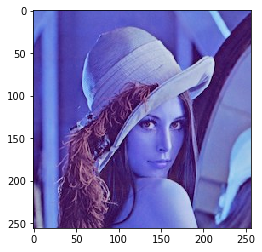

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[105.09368445 127.69842714 219.80293263]
  [105.01321647 128.07363247 220.09367451]
  [106.04118301 126.93602678 219.01860208]
  ...
  [ 86.0380111   86.8788256  191.07465414]
  [  0.51625094  88.95018453   0.39945115]
  [ 87.93803093  96.89911072 200.82125117]]

 [[104.96515784 128.00321148 219.938606  ]
  [105.05860924 127.94478468 220.03461412]
  [105.83790037 127.01608312 218.91693141]
  ...
  [ 99.05864632   0.37820381 200.8977331 ]
  [  0.78573645  95.01691575 196.84903765]
  [  0.87792245  88.06069218 190.23880585]]

 [[104.01221839 126.95960125 218.97351876]
  [103.87532803 127.15286373 219.05574342]
  [105.8351453  127.05698064 218.90817793]
  ...
  [106.91731014 102.83831507 199.11542695]
  [  0.96823354  90.93195183 188.19609584]
  [ 82.92567718  75.96382489 173.00554588]]

 ...

 [[ 75.99989932  48.90919942 112.08875626]
  [ 83.93731092  58.11989052 118.03622983]
  [ 92.10316004  63.97232566 123.09748978]
  ...
  [ 74.05411498  46.02831233 114.90519791]
  [ 68.99848527  3

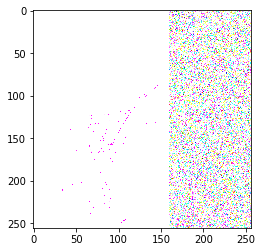

In [13]:
import glob
from PIL import Image
import cv2 
import numpy as np
import types
import os
#from nbutils import showarray
from matplotlib import pyplot as plt
import scipy
import skimage
#img_ref = lena()[140:,120:][:256,:256] / 255.0
img_ref = cv2.imread("lena.jpg")
def make_noisy(img):
    # add gaussian noise
    img = img + 0.1 * np.random.normal(size=img.shape)
    # add some outliers in on the right side of the image
    m = np.random.rand(*img.shape) < 0.2
    m[:,:160] = 0
    img[m] = np.random.rand(m.sum())
    return img

img_obs = make_noisy(img_ref)

plt.imshow(img_ref)
#Mat mDist32S = new Mat();
skimage.img_as_float(img_obs)
plt.show()
plt.imshow(img_obs)

print(img_obs)
plt.show()

.
.
.
.
.
.
.
.
.
.
.


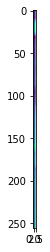

In [25]:
import glob
from PIL import Image
import cv2 
import numpy as np
import types
import os
#from nbutils import showarray
from matplotlib import pyplot as plt
import scipy
import skimage
#img_ref = lena()[140:,120:][:256,:256] / 255.0
img_ref = cv2.imread("lena.jpg")

def nablaT(G):
    h, w = G.shape[:2]
    I = np.zeros((h, w), G.dtype)
    # note that we just reversed left and right sides
    # of each line to obtain the transposed operator
    I[:, :-1] -= G[:, :-1, 0]
    I[:, 1: ] += G[:, :-1, 0]
    I[:-1]    -= G[:-1, :, 1]
    I[1: ]    += G[:-1, :, 1]
    return I

def nabla(I):
    h, w = I.shape
    G = np.zeros((h, w, 2), I.dtype)
    G[:, :-1, 0] -= I[:, :-1]
    G[:, :-1, 0] += I[:, 1:]
    G[:-1, :, 1] -= I[:-1]
    G[:-1, :, 1] += I[1:]
    return G

def anorm2(a):
    return (a*a).sum(-1)
def anorm(a):
    return np.sqrt( anorm2(a) )

def project_nd(P, r):
    '''perform a pixel-wise projection onto R-radius balls'''
    nP = np.maximum(1.0, anorm(P)/r)
    return P / nP[...,np.newaxis]

def solve_TVL1_multy(imgs, clambda, iter_n=101):
    # setting step sizes and other params
    L2 = 8.0
    tau = 0.02
    sigma = 1.0 / (L2*tau)
    theta = 1.0

    imgs = np.array(imgs)
    X = imgs[0].copy()
    P = nabla(X)
    Rs = np.zeros_like(imgs)
    for i in range(iter_n):
        P = project_nd( P + sigma*nabla(X), 1.0 )
        Rs = np.clip(Rs + sigma*(X-imgs), -clambda, clambda)
        X1 = X - tau*(nablaT(P) + Rs.sum(0))
        X = X1 + theta * (X1 - X)
        if i % 10 == 0:
            print("."),
    print
    return X * 255


plt.imshow(solve_TVL1_multy(img_ref, 0.5))

plt.show()